In [1]:
%matplotlib notebook

In [2]:
import getCycles
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def trans(sigma_path0,net1,N,typ = 0, thr = 0):
    """
    transiton function. net1 is the network that generates the ttransitions
    
    If sigma_path0 is a binary vector it generates the corresponding transtions.
    
    If sigma_path0 is a list of binary vectors it generates a list with the corresponding transtions.
    
    typ determins if the neuron activation state is defined in {-1,1} or {0,1} 
    typ=1 --> {-1,1}    typ=0 --> {0,1} 
    """
    sigma_path1 = net1.dot(sigma_path0.T)
    print(sigma_path1)
    sigma_path1 [sigma_path1  == 0] = 0.000001
    print(sigma_path1)
    sigma_path1 = (1-typ+np.sign(sigma_path1 +thr))/(2-typ)
    print(sigma_path1)
    return sigma_path1.T   

In [3]:
N= 1000 # Number of neurons
typ = 0 # typ = 0 neurons with binary activation states {0,1}, typ = 1  neurons with states {-1,1}.
        # typ=1 --> {-1,1}    typ=0 --> {0,1} 
thr = 0 # activation function threshold
nP = {"N":N, "typ":typ, "thr": thr}

In [4]:
s0 = np.random.binomial(1, 0.5, N)
print(s0.shape)
print(s0)

(1000,)
[0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1
 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1
 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 

In [5]:
#genero una rete casuale con seme 'seed' (connessioni casuali tra nodi)
#G=nx.watts_strogatz_graph(N,20,0.1,3345)
#genero matrice delle adiacenze di G
#C=nx.adjacency_matrix(G).todense()
#assegnazione dei pesi random ai collegamenti 
# (per generazione matrice di pesi uso seme 'seed') (?)
pesi=2*np.random.rand(N,N)-1
net1=pesi#np.multiply(pesi,C)
print(net1.shape)

(1000, 1000)


<IPython.core.display.Javascript object>


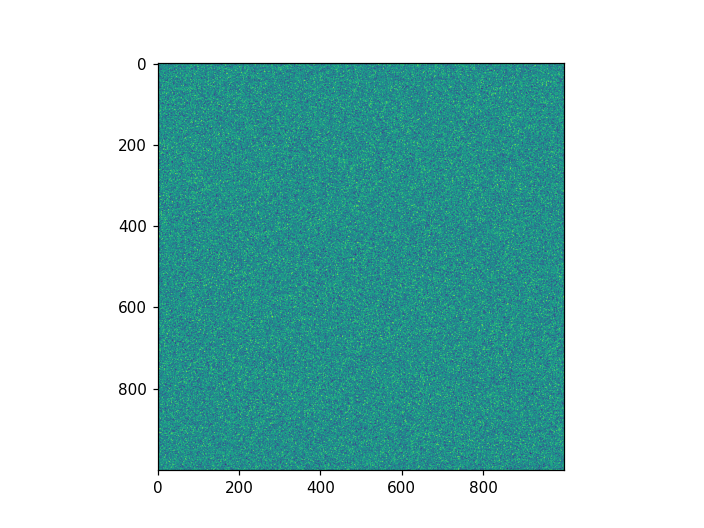

In [6]:
plt.figure()
plt.imshow(net1)

In [7]:
print(s0.T)
print(net1)
sigma_path1 = np.dot(net1,s0).T
print(sigma_path1.dtype)
print(sigma_path1)

[1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1
 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 0 

In [8]:
states = s0.reshape((1,N))
print(states.shape)

s1 = getCycles.transPy(s0,net1,N,typ = 0, thr = 0)
print(s1.reshape((1,N)).shape)

np.stack([states,s1.reshape((1,N))])

(1, 1000)
(1, 1000)


array([[[1., 1., 0., ..., 1., 1., 1.]],

       [[0., 1., 1., ..., 0., 0., 0.]]])

In [9]:
states = np.array(s0)
print(states)

[1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1
 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1
 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1
 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1
 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1
 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 0 0 0 1 1 0 0 

In [10]:
passi = 3000
states = np.zeros((passi,N))

states[0,:] = s0

for i in range(1,passi):
    s1 = getCycles.transPy(s0,net1,N,typ = 0, thr = 0)
    #print(s1)
    s0=s1.T
    states[i,:] = s1.T

<IPython.core.display.Javascript object>


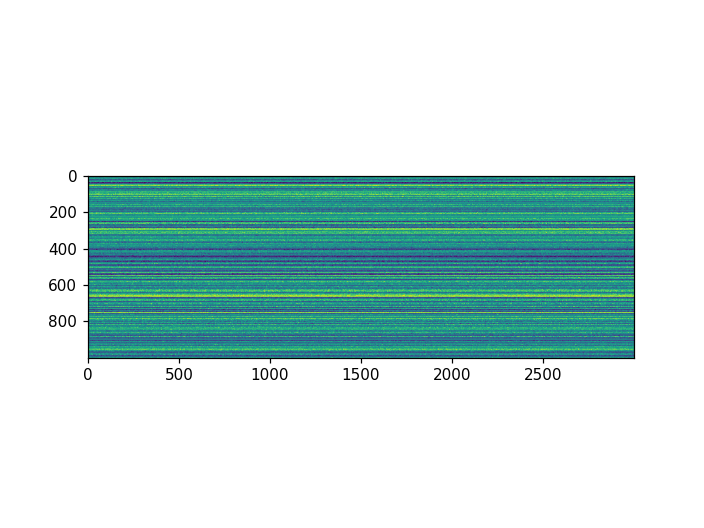

In [11]:
plt.figure()
plt.imshow(states.T)

# Parcellizzazione
https://www.sciencedirect.com/science/article/pii/S2211124720314601?via%3Dihub

In [5]:
%ls

getCyclesAsy.py
getCycles.py
getCycles.pyc
HowToHRNN.ipynb
hrnn.cpp
hrnn.cpython-37m-x86_64-linux-gnu.so*
multiprocessinRunRHNN.py
newSim.ipynb
picco-asym.png
__pycache__/
README.md
Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv
single_hrnn_run.py
test1.py
test2.py
TurboSpinwNoice.ipynb


<IPython.core.display.Javascript object>


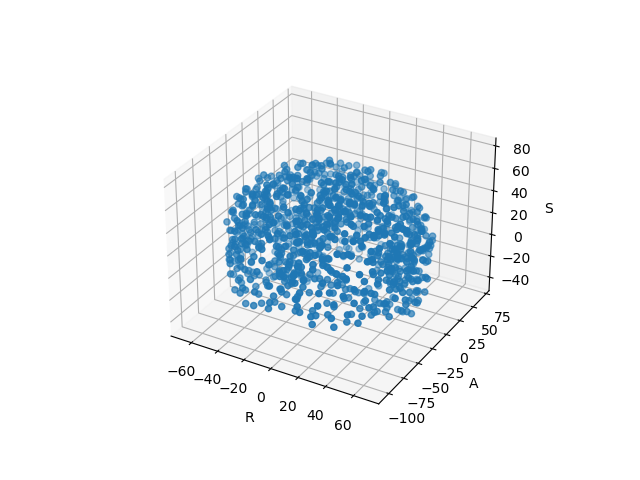

Text(0.5, 0, 'S')

In [6]:
df = pd.read_csv('Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')
df.head()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = df['R']
Y = df['A']
Z = df['S']

ax.scatter(X, Y, Z)

ax.set_xlabel('R')
ax.set_ylabel('A')
ax.set_zlabel('S')

In [7]:
coords = np.array([X,Y,Z]).T

def euc(listCoords):
    return np.array([[ np.linalg.norm(i-j) for j in listCoords] for i in listCoords])

def euc2(listCoords):
    return np.array([[np.sum((i-j)**2) for j in listCoords] for i in listCoords])

dist = euc(coords)
dist.shape

dist2=np.sqrt(euc2(coords))

<IPython.core.display.Javascript object>


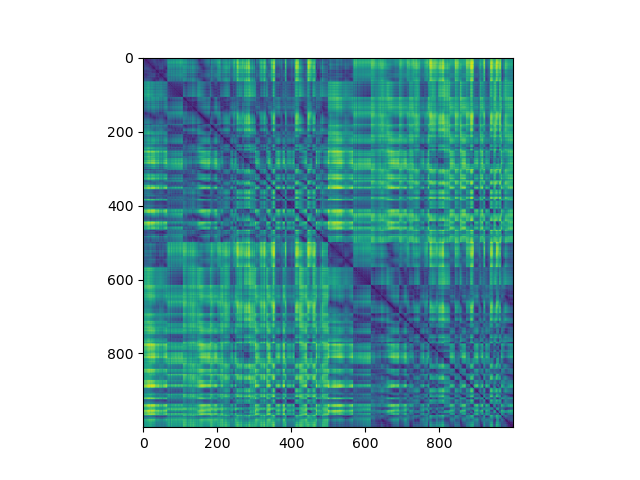

<IPython.core.display.Javascript object>


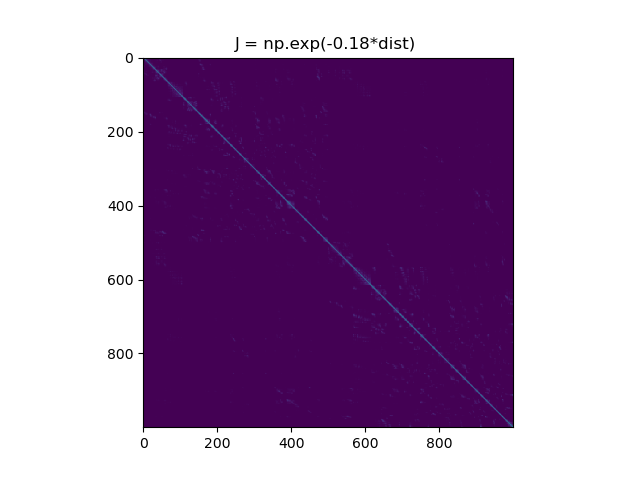

<IPython.core.display.Javascript object>


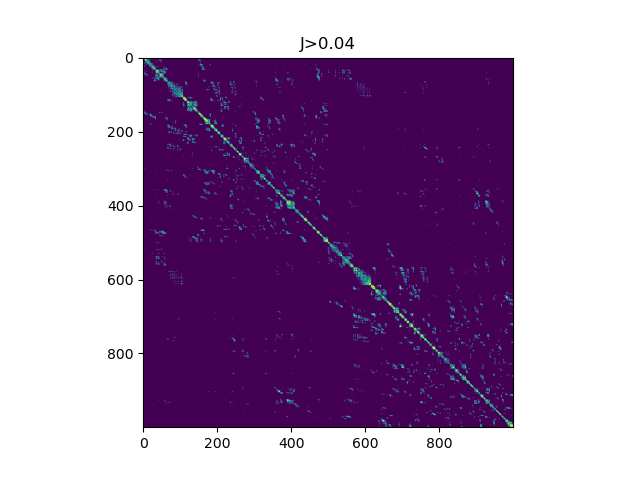

In [8]:
plt.figure()
plt.imshow(dist)

J = np.exp(-0.18*dist)
plt.figure()
plt.title('J = np.exp(-0.18*dist) ')
plt.imshow(J)

plt.figure()
plt.title('J>0.04')
plt.imshow(J>0.04)

# Spin

<IPython.core.display.Javascript object>


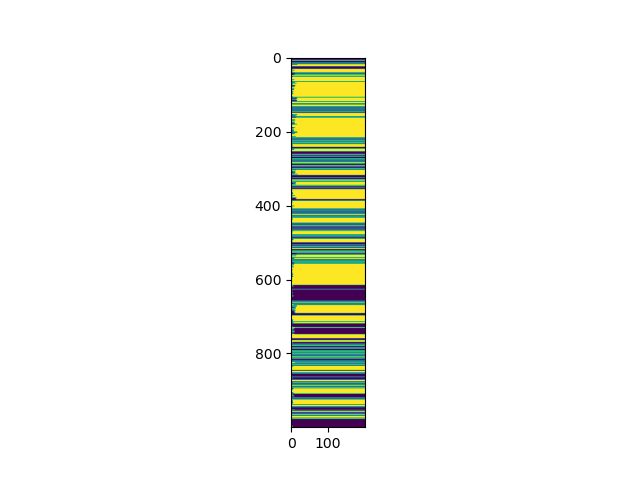

<IPython.core.display.Javascript object>


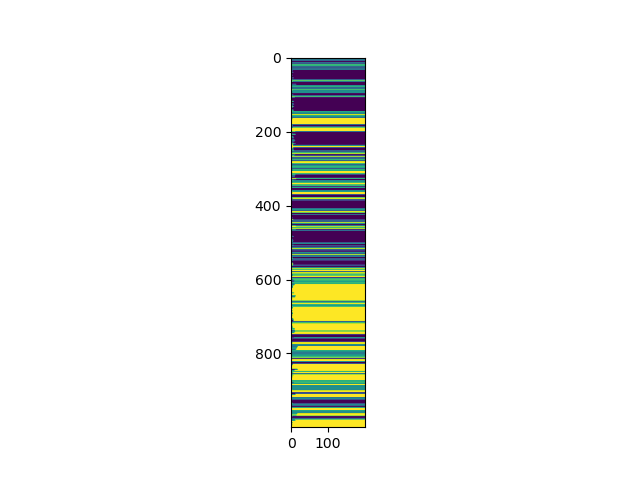

<IPython.core.display.Javascript object>


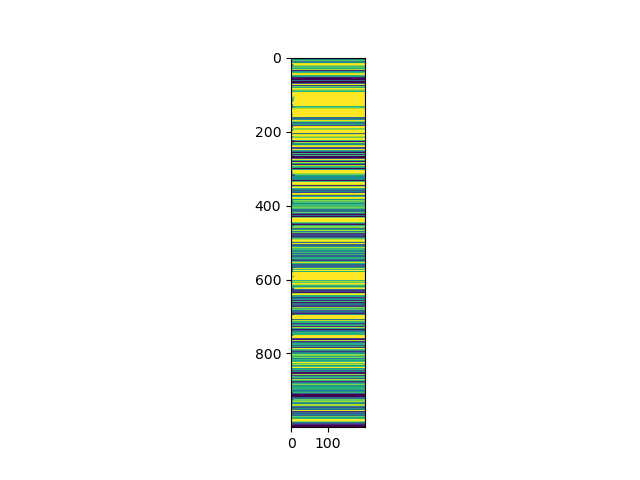

<IPython.core.display.Javascript object>


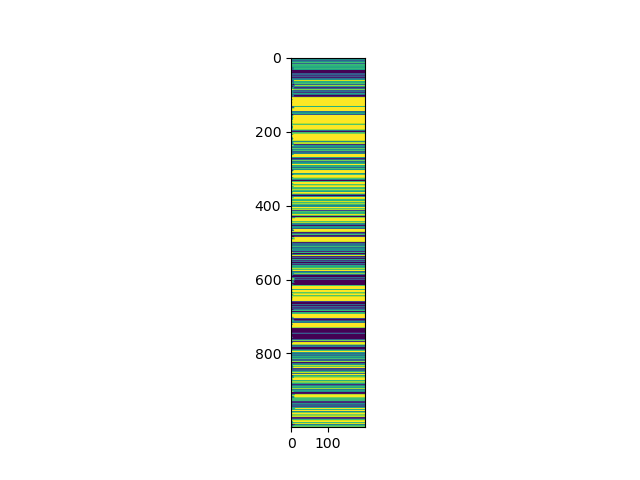

<IPython.core.display.Javascript object>


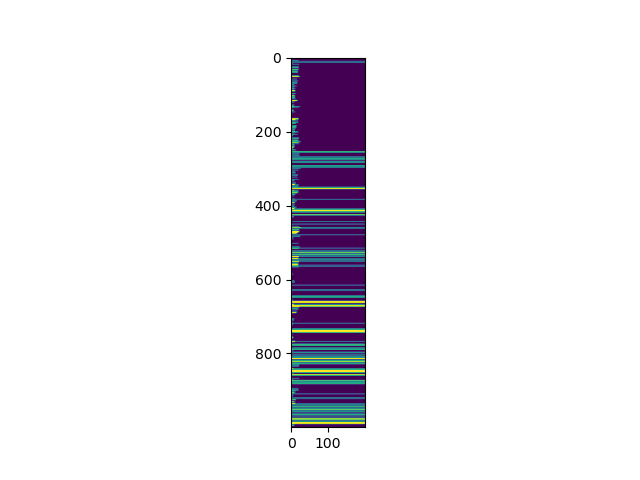

<IPython.core.display.Javascript object>


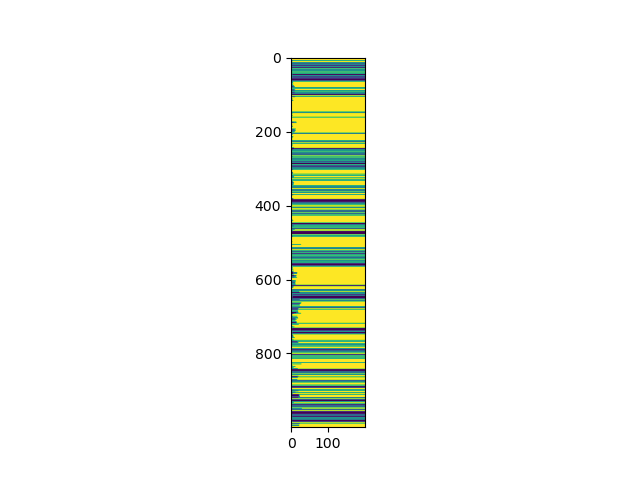

<IPython.core.display.Javascript object>


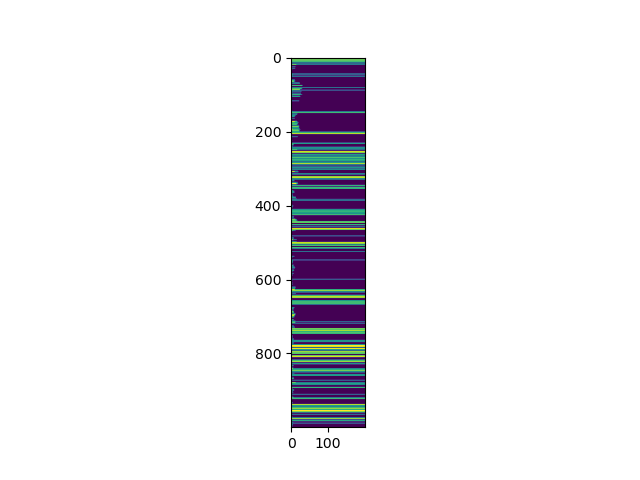

<IPython.core.display.Javascript object>


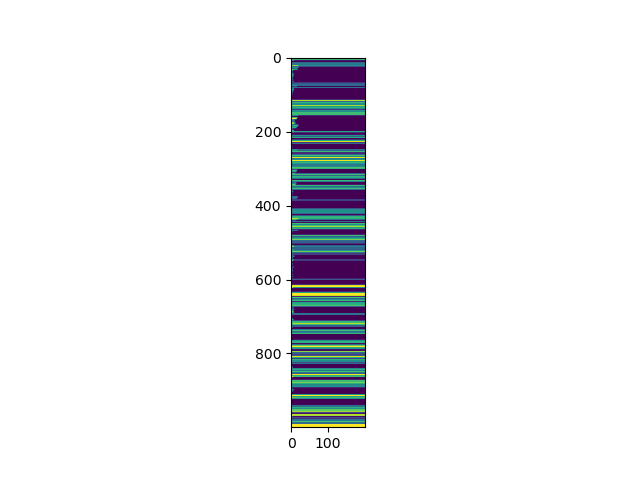

<IPython.core.display.Javascript object>


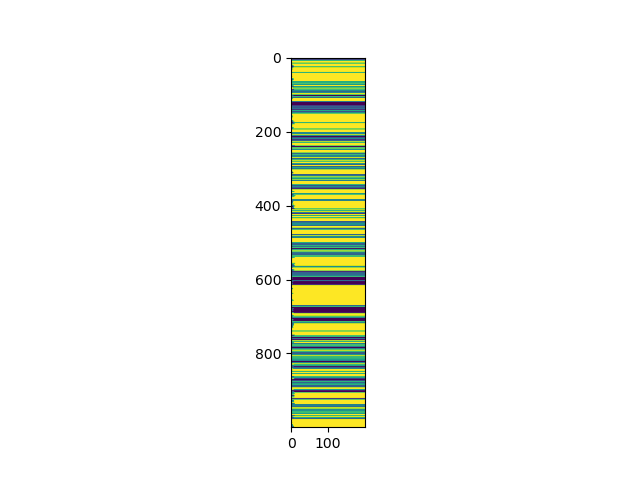

<IPython.core.display.Javascript object>


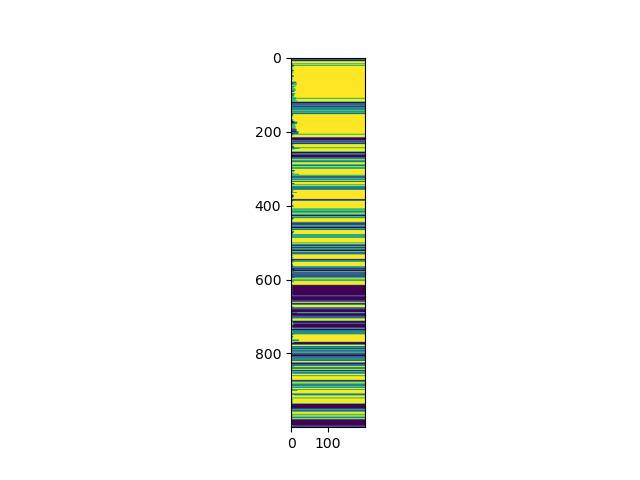

<IPython.core.display.Javascript object>


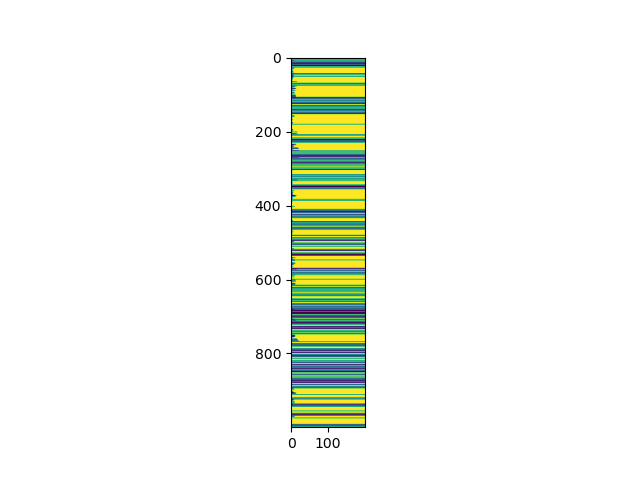

/tmp/ipykernel_61971/846692725.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


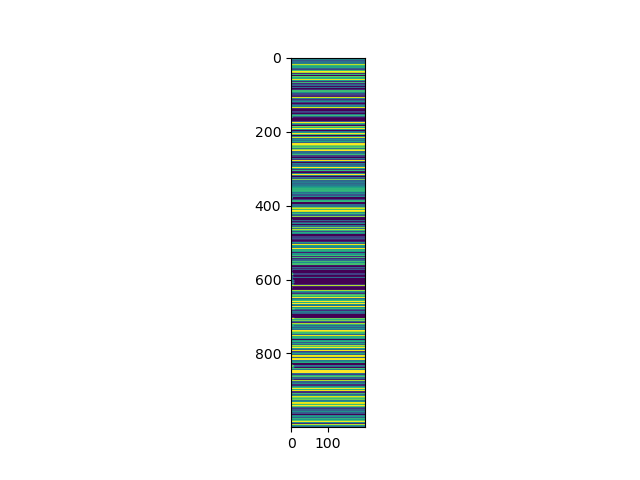

<IPython.core.display.Javascript object>


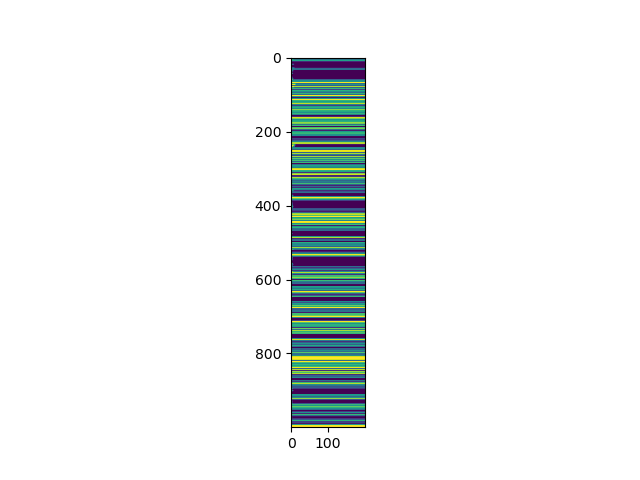

<IPython.core.display.Javascript object>


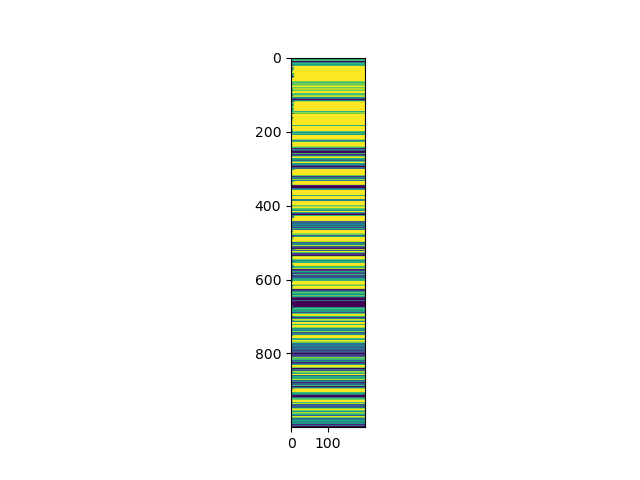

<IPython.core.display.Javascript object>


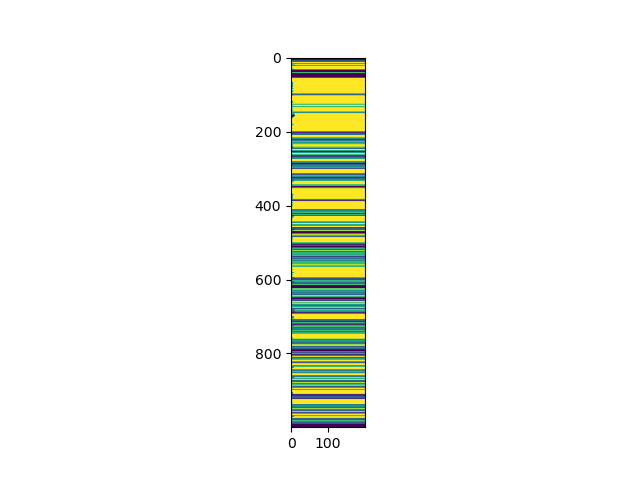

<IPython.core.display.Javascript object>


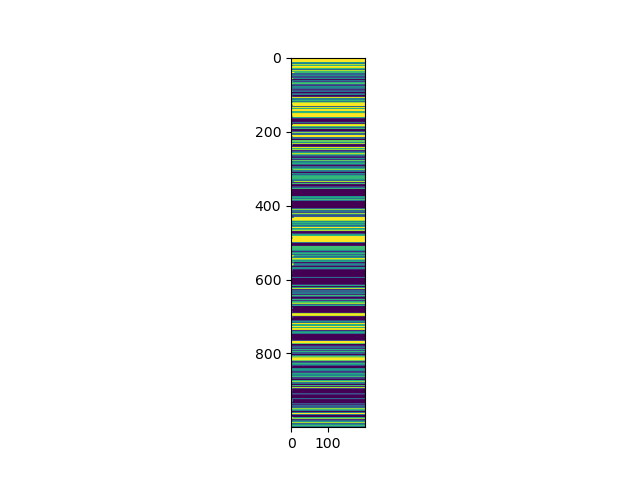

<IPython.core.display.Javascript object>


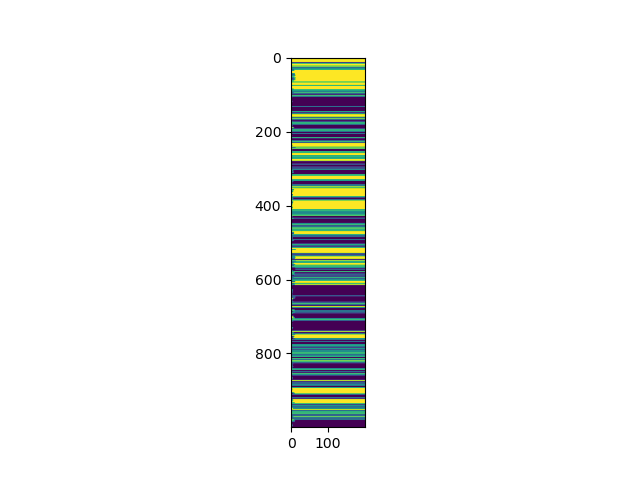

<IPython.core.display.Javascript object>


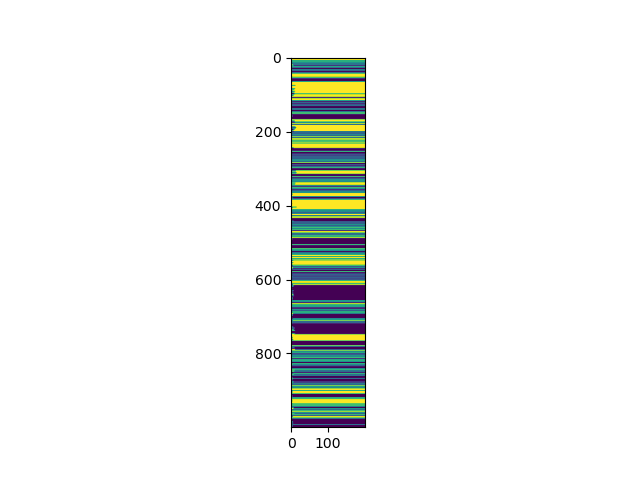

<IPython.core.display.Javascript object>


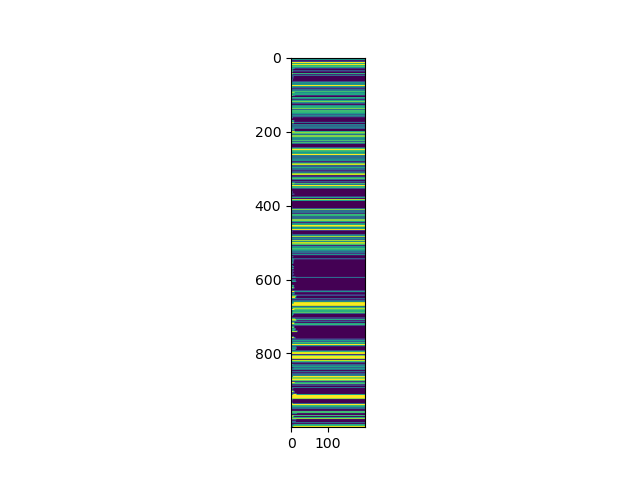

<IPython.core.display.Javascript object>


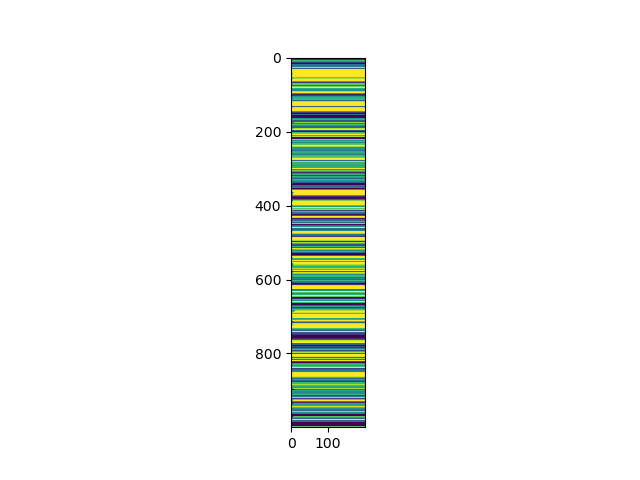

In [32]:
np.random.seed(8792)

runs = 20
passi = 200
states = np.zeros((runs,passi,N))

for r in range(runs):
    s0 = 2*np.random.binomial(1, 0.5, N)-1
    states[r,0,:] = s0

    for t in range(1,passi):
        s1 = getCycles.transPy(s0,J,N,typ = 1, thr = 0)
        #print(s1)
        s0=s1.T
        states[r,t,:] = s1.T

    plt.figure()
    plt.imshow(states[r,:,:].T)

In [34]:
uniqDist = np.unique(dist)
#plt.figure()
#plt.hist(uniqDist,bins=100)
ii,jj=np.mgrid[0:N, 0:N]
#print(ii)
#print(jj)

Bd = [[] for r in range(runs)]

for r in range(runs):
    for d in uniqDist:
        #print(d,np.sum(dist==d))
        iList = ii[dist==d]
        jList = jj[dist==d]
        cors = []
        for i,j in zip(iList,jList):
            cor = np.mean(states[r,:,i]*states[r,:,j])
            cors.append(cor)
        Bd[r].append(np.mean(cors))


<IPython.core.display.Javascript object>


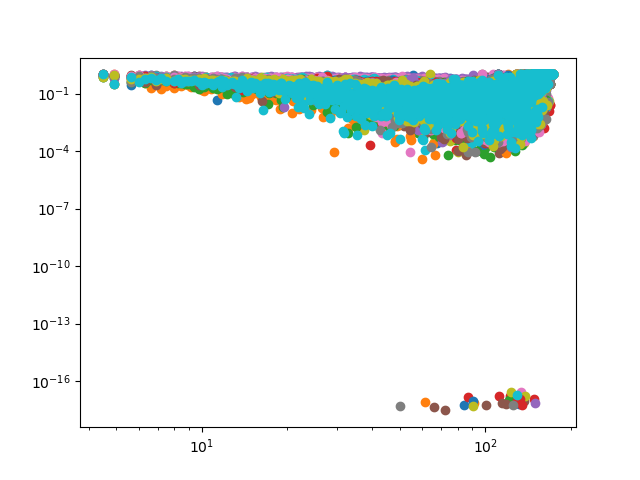

<IPython.core.display.Javascript object>


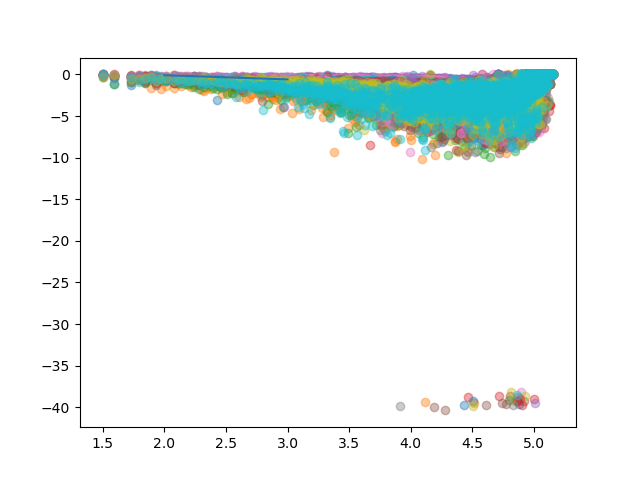

/tmp/ipykernel_61971/785537170.py:8: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
/tmp/ipykernel_61971/785537170.py:8: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)


In [35]:
plt.figure()
for r in range(runs):
    plt.scatter(uniqDist,Bd[r])
plt.loglog()

plt.figure()
for r in range(runs):
    plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
plt.plot([2,3],[-0.1,-0.1 -0.5])

<IPython.core.display.Javascript object>


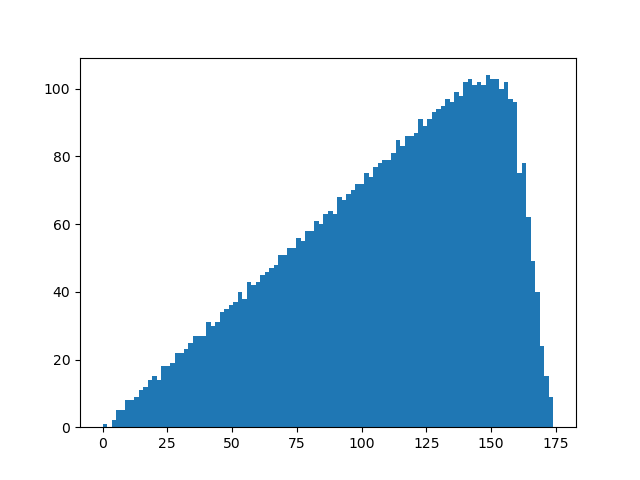

<IPython.core.display.Javascript object>


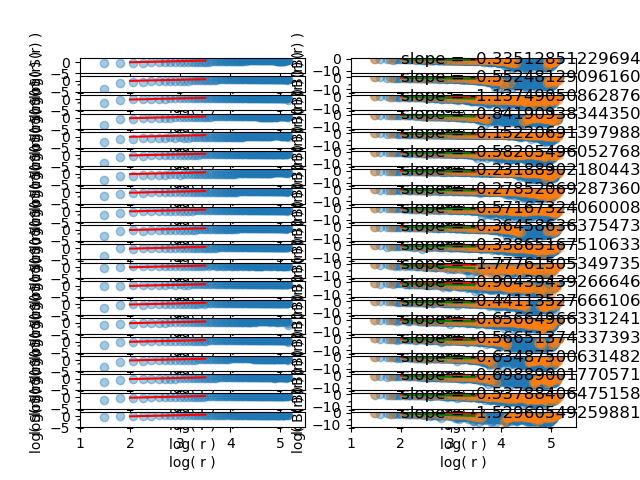

/tmp/ipykernel_61971/3387344108.py:16: RuntimeWarning: divide by zero encountered in log
  ax[r,1].scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
/tmp/ipykernel_61971/3387344108.py:16: RuntimeWarning: invalid value encountered in log
  ax[r,1].scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
/tmp/ipykernel_61971/3387344108.py:17: RuntimeWarning: invalid value encountered in log
  ax[r,1].scatter(np.log(rs),np.log(binnedBd),alpha=0.4)
/tmp/ipykernel_61971/3387344108.py:21: RuntimeWarning: invalid value encountered in log
  y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]
/tmp/ipykernel_61971/3387344108.py:26: RuntimeWarning: divide by zero encountered in log
  ax[r,0].scatter(np.log(rs),np.log(2*(binnedBd[0] - binnedBd)),alpha=0.4)
/tmp/ipykernel_61971/3387344108.py:17: RuntimeWarning: divide by zero encountered in log
  ax[r,1].scatter(np.log(rs),np.log(binnedBd),alpha=0.4)
/tmp/ipykernel_61971/3387344108.py:21: RuntimeWarning: divide by zero encountered in log
  y=np.log(binnedBd)#[n

c [-0.33512851  0.30651737]
c [-0.55248129  0.92330253]
c [-1.13749051  1.81515087]
c [-0.84190938  1.40009997]
c [-0.15220691  0.06362222]
c [-0.58205496  0.87186003]
c [-0.23188902  0.18727613]
c [-0.27852069 -0.00065507]
c [-0.57167324  0.79271906]
c [-0.36458636  0.34297441]
c [-0.33865168 -0.0205078 ]
c [-1.77761505  2.54012639]
c [-0.90439439  0.88637191]
c [-0.44113528  0.34397943]
c [-0.65664966  0.85329477]
c [-0.56651374  0.55507136]
c [-0.63487501  1.01254491]
c [-0.69889002  1.08713836]
c [-0.53788406  0.59618152]
c [-1.52960549  2.71158022]


<IPython.core.display.Javascript object>


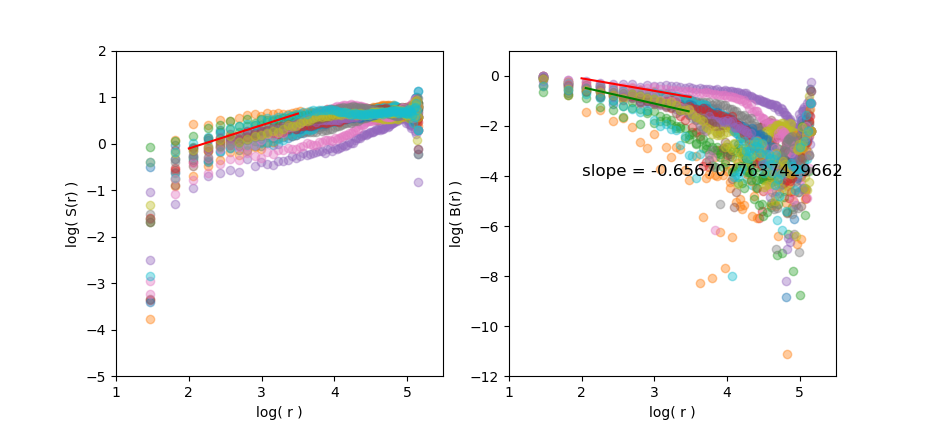

/tmp/ipykernel_61971/3387344108.py:59: RuntimeWarning: invalid value encountered in log
  ax[1].scatter(np.log(rsTemp),np.log(binnedBdTemp),alpha=0.4)
/tmp/ipykernel_61971/3387344108.py:60: RuntimeWarning: divide by zero encountered in log
  ax[0].scatter(np.log(rsTemp),np.log(2*(binnedBdTemp[0] - binnedBdTemp)),alpha=0.4)
/tmp/ipykernel_61971/3387344108.py:59: RuntimeWarning: divide by zero encountered in log
  ax[1].scatter(np.log(rsTemp),np.log(binnedBdTemp),alpha=0.4)


c [-0.65670776  0.86343243]


/tmp/ipykernel_61971/3387344108.py:69: RuntimeWarning: divide by zero encountered in log
  y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]
/tmp/ipykernel_61971/3387344108.py:69: RuntimeWarning: invalid value encountered in log
  y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]


In [38]:
plt.figure()
h,bins,f=plt.hist(uniqDist,bins=100)


f,ax=plt.subplots(runs,2)

for r in range(runs):
    rs = []
    binnedBd = []
    for ra,rb in zip(bins[:-1],bins[1:]):
        gate = np.logical_and(uniqDist>=ra, uniqDist<=rb)
        binnedBd.append(np.mean(np.array(Bd[r])[gate]))
        rs.append(0.5*(ra+rb))
    binnedBd = np.array(binnedBd)
    
    ax[r,1].scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
    ax[r,1].scatter(np.log(rs),np.log(binnedBd),alpha=0.4)
    ax[r,1].plot([2,3.5],[-0.1,-0.1 -(1.5*0.5)],'r')
    #plt.xlim((2,4))
    x=np.log(rs)
    y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]
    gate= np.logical_and(np.logical_and(x>2, x<3.5),np.isfinite(y))
    x=x[gate]
    y=y[gate]
    
    ax[r,0].scatter(np.log(rs),np.log(2*(binnedBd[0] - binnedBd)),alpha=0.4)
    ax[r,0].plot([2,3.5],[-0.1,-0.1 + 1.5*0.5],'r')

    A = np.vstack([x, np.ones(len(x))]).T
    #print(x,y)
    # Direct least square regression
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
    print('c',alpha)
    ax[r,1].plot(x, alpha[0]*x + alpha[1], '-g')
    ax[r,1].set_ylabel('log( B(r) )')
    ax[r,1].set_xlabel('log( r )')
    ax[r,1].set_xlim((1,5.5))
    ax[r,1].set_ylim((-12,1))
    ax[r,1].text(2, -4, 'slope = '+str(alpha[0]), fontsize=12)
    #ax[r,0].plot(x, alpha[0]*x + alpha[1], '-g')
    ax[r,0].set_ylabel('log( S(r) )')
    ax[r,0].set_xlabel('log( r )')
    ax[r,0].set_xlim((1,5.5))
    ax[r,0].set_ylim((-5,2))
    #ax[r,0].text(2, -4, 'slope = '+str(alpha[0]), fontsize=12)
    
f,ax=plt.subplots(1,2)
rs = []
binnedBd = []    
for r in range(runs):
    rsTemp = []
    binnedBdTemp = [] 
    for ra,rb in zip(bins[:-1],bins[1:]):
        gate = np.logical_and(uniqDist>=ra, uniqDist<=rb)
        binnedBdTemp.append(np.mean(np.array(Bd[r])[gate]))
        rsTemp.append(0.5*(ra+rb))
    binnedBd = binnedBd + binnedBdTemp
    binnedBdTemp = np.array(binnedBdTemp)
    ax[1].scatter(np.log(rsTemp),np.log(binnedBdTemp),alpha=0.4)
    ax[0].scatter(np.log(rsTemp),np.log(2*(binnedBdTemp[0] - binnedBdTemp)),alpha=0.4)
    rs = rs + rsTemp
    


#plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
#plt.scatter(np.log(rs),np.log(binnedBd),alpha=0.4)
ax[1].plot([2,3.5],[-0.1,-0.1 -(1.5*0.5)],'r')
x=np.log(rs)
y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]
gate= np.logical_and(np.logical_and(x>2, x<3.5),np.isfinite(y))
x=x[gate]
y=y[gate]

A = np.vstack([x, np.ones(len(x))]).T
#print(x,y)
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print('c',alpha)
ax[1].plot(x, alpha[0]*x + alpha[1], '-g')
ax[1].set_ylabel('log( B(r) )')
ax[1].set_xlabel('log( r )')
ax[1].set_xlim((1,5.5))
ax[1].set_ylim((-12,1))
ax[1].text(2, -4, 'slope = '+str(alpha[0]), fontsize=12)


ax[0].set_ylabel('log( S(r) )')
ax[0].set_xlabel('log( r )')
ax[0].set_xlim((1,5.5))
ax[0].set_ylim((-5,2))
ax[0].plot([2,3.5],[-0.1,-0.1 + 1.5*0.5],'r')

In [72]:
np.isfinite(y)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True])

<IPython.core.display.Javascript object>


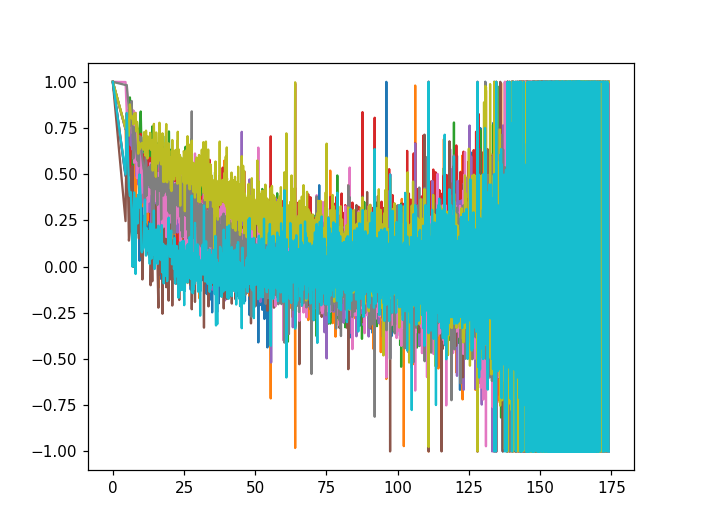

In [20]:
cors = []
ts = range(1,passi)
for t in ts:
    cor = np.mean(states[r,:-t,:]*states[r,t:,:])
    cors.append(cor)

plt.figure()
for r in range(runs):
    plt.plot(uniqDist,Bd[r])

# Neuron

<IPython.core.display.Javascript object>


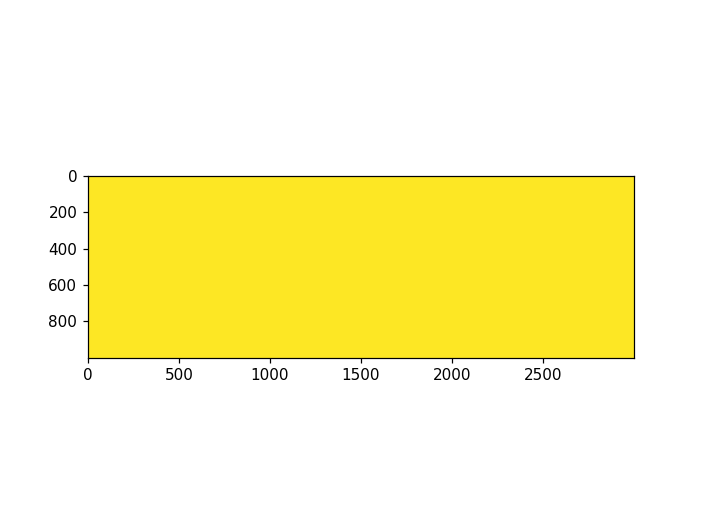

In [107]:
passi = 3000
states = np.zeros((passi,N))

s0 = np.random.binomial(1, 0.5, N)
states[0,:] = s0

for t in range(1,passi):
    s1 = getCycles.transPy(s0,J,N,typ = 0, thr = 0)
    #print(s1)
    s0=s1.T
    states[t,:] = s1.T
    
plt.figure()
plt.imshow(states.T)

In [108]:
uniqDist = np.unique(dist)
#plt.figure()
#plt.hist(uniqDist,bins=100)
ii,jj=np.mgrid[0:N, 0:N]
#print(ii)
#print(jj)

Bd = []

for d in uniqDist:
    #print(d,np.sum(dist==d))
    iList = ii[dist==d]
    jList = jj[dist==d]
    cors = []
    for i,j in zip(iList,jList):
        cor = np.mean(states[:,i]*states[:,j])
        cors.append(cor)
    Bd.append(np.mean(cors))


<IPython.core.display.Javascript object>


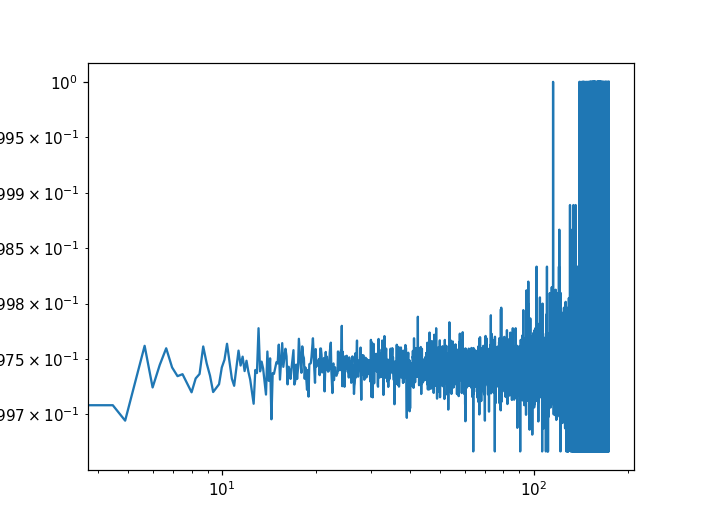

<IPython.core.display.Javascript object>


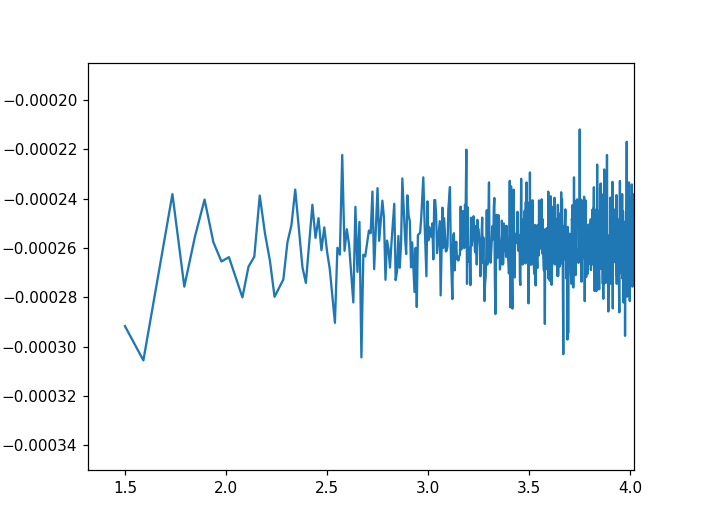

/home/gosti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [109]:
plt.figure()
plt.plot(uniqDist,Bd)
plt.loglog()

plt.figure()
plt.plot(np.log(uniqDist),np.log(Bd))

# Neuron with Random Sign on J

In [94]:
randJ = np.sign(2*np.random.rand(N,N)-1)
print(randJ)
randJ = randJ*J

[[-1. -1. -1. ...  1. -1. -1.]
 [ 1.  1. -1. ... -1. -1.  1.]
 [-1.  1. -1. ... -1. -1.  1.]
 ...
 [-1. -1.  1. ... -1. -1.  1.]
 [ 1.  1. -1. ... -1. -1. -1.]
 [-1.  1. -1. ... -1.  1.  1.]]


<IPython.core.display.Javascript object>


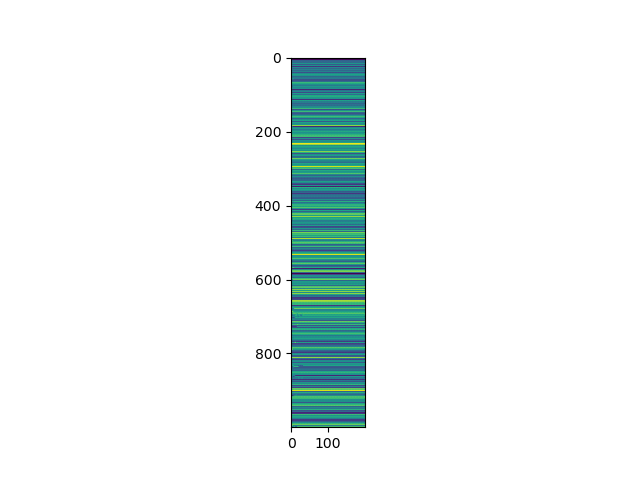

<IPython.core.display.Javascript object>


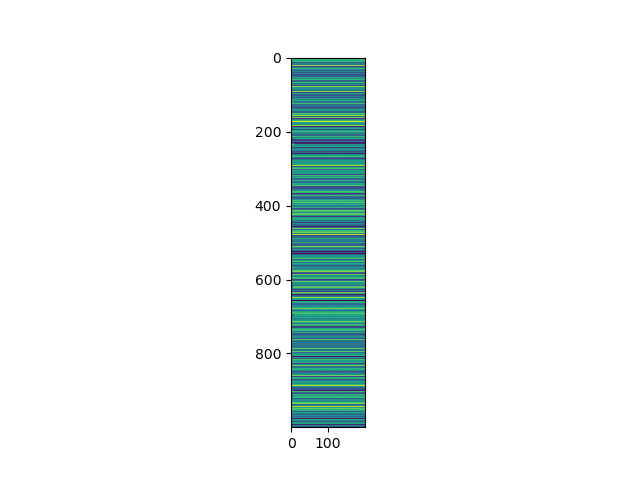

<IPython.core.display.Javascript object>


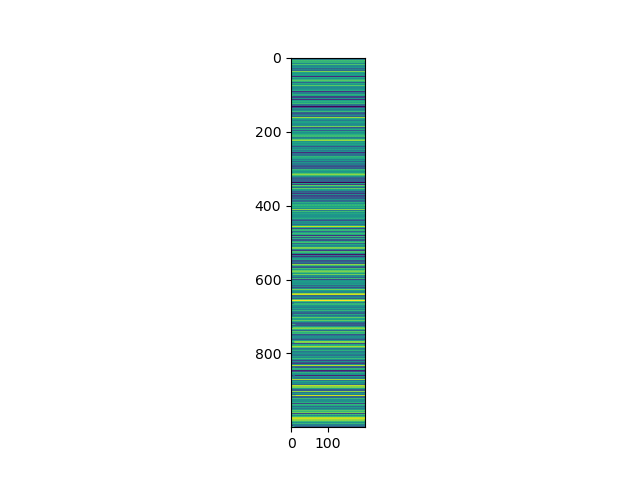

<IPython.core.display.Javascript object>


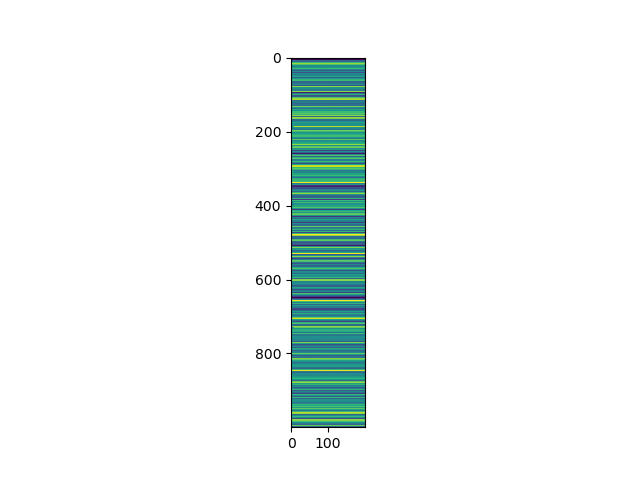

In [96]:
runs = 4
passi = 200
states = np.zeros((runs,passi,N))

for r in range(runs):
    s0 = 2*np.random.binomial(1, 0.5, N)-1
    states[r,0,:] = s0

    for t in range(1,passi):
        s1 = getCycles.transPy(s0,randJ,N,typ = 1, thr = 0)
        #print(s1)
        s0=s1.T
        states[r,t,:] = s1.T

    plt.figure()
    plt.imshow(states[r,:,:].T)

In [97]:
uniqDist = np.unique(dist)
#plt.figure()
#plt.hist(uniqDist,bins=100)
ii,jj=np.mgrid[0:N, 0:N]
#print(ii)
#print(jj)

Bd = [[] for r in range(runs)]

for r in range(runs):
    for d in uniqDist:
        #print(d,np.sum(dist==d))
        iList = ii[dist==d]
        jList = jj[dist==d]
        cors = []
        for i,j in zip(iList,jList):
            cor = np.mean(states[r,:,i]*states[r,:,j])
            cors.append(cor)
        Bd[r].append(np.mean(cors))


<IPython.core.display.Javascript object>


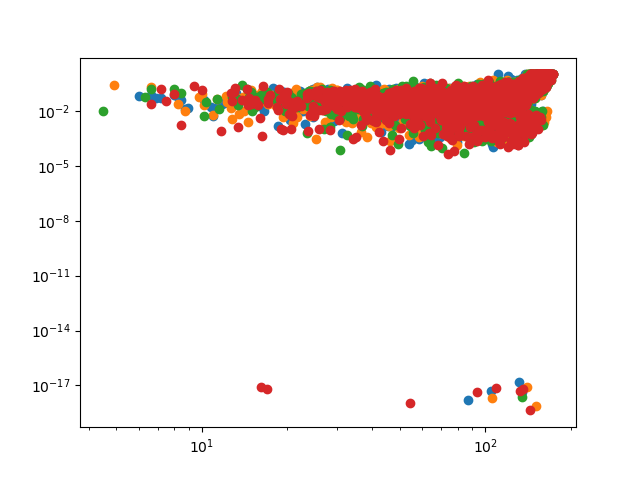

<IPython.core.display.Javascript object>


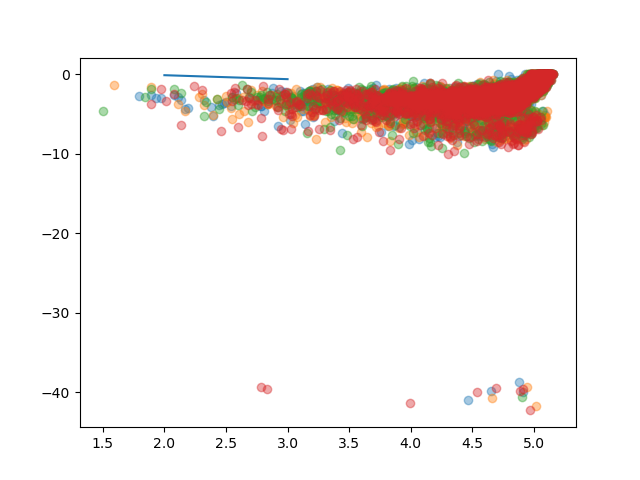

/tmp/ipykernel_4711/785537170.py:8: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
/tmp/ipykernel_4711/785537170.py:8: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)


In [98]:
plt.figure()
for r in range(runs):
    plt.scatter(uniqDist,Bd[r])
plt.loglog()

plt.figure()
for r in range(runs):
    plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
plt.plot([2,3],[-0.1,-0.1 -0.5])

<IPython.core.display.Javascript object>


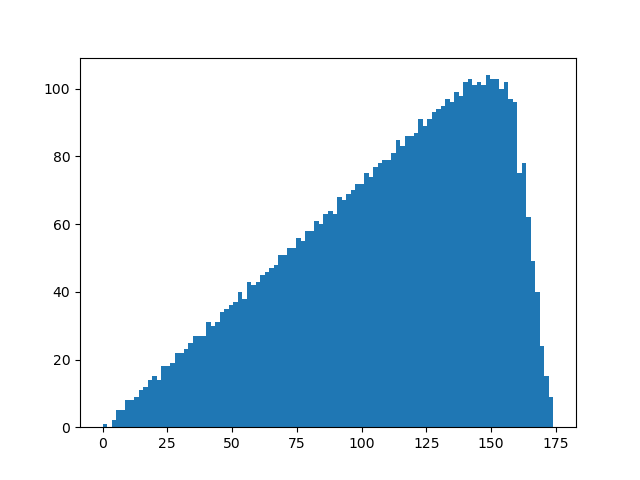

<IPython.core.display.Javascript object>


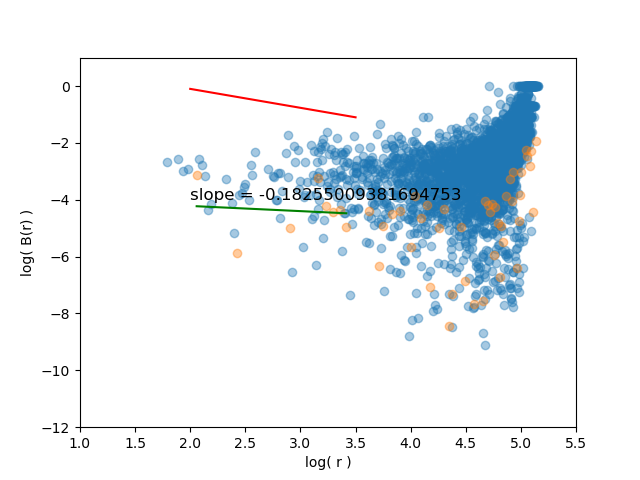

c [-0.18255009 -3.85225   ]


/tmp/ipykernel_4711/2342834893.py:13: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
/tmp/ipykernel_4711/2342834893.py:13: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
/tmp/ipykernel_4711/2342834893.py:14: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(rs),np.log(binnedBd),alpha=0.4)
/tmp/ipykernel_4711/2342834893.py:14: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(rs),np.log(binnedBd),alpha=0.4)
/tmp/ipykernel_4711/2342834893.py:18: RuntimeWarning: divide by zero encountered in log
  y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]
/tmp/ipykernel_4711/2342834893.py:18: RuntimeWarning: invalid value encountered in log
  y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]


<IPython.core.display.Javascript object>


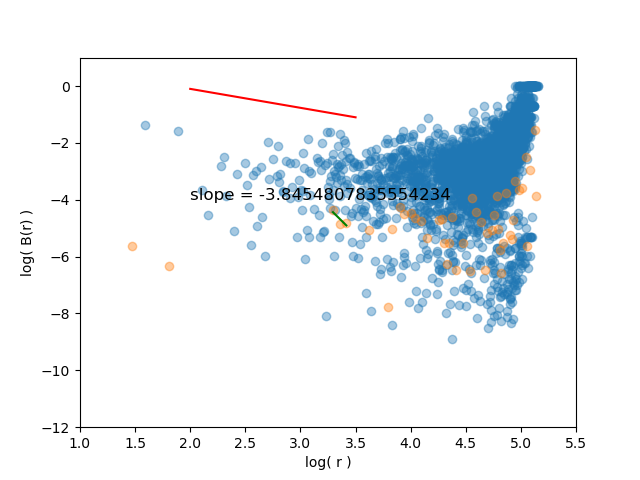

c [-3.84548078  8.23453097]


<IPython.core.display.Javascript object>


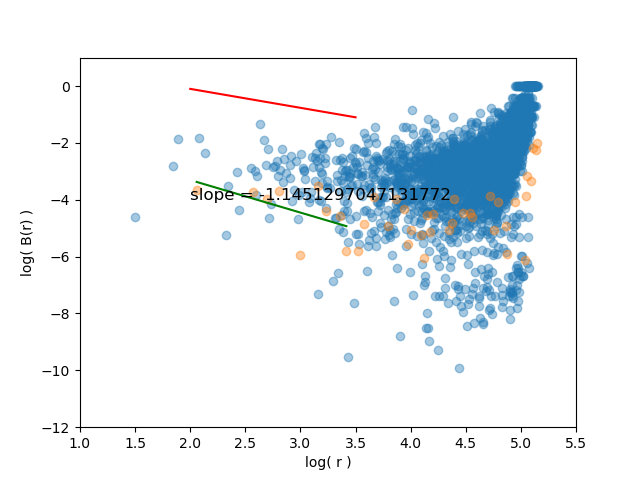

c [-1.1451297  -1.01596121]


<IPython.core.display.Javascript object>


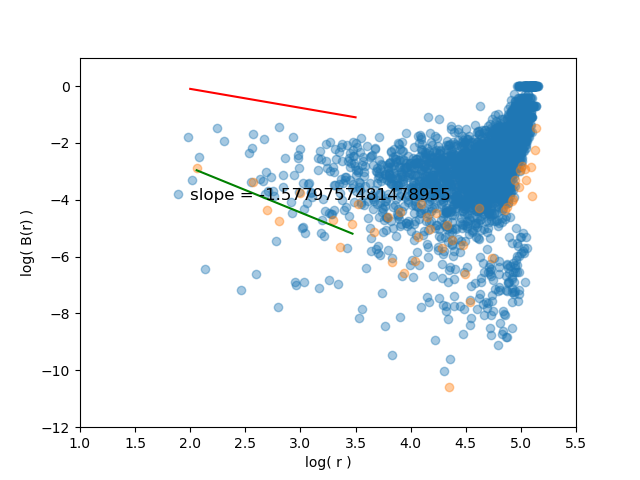

c [-1.57797575  0.28587351]


<IPython.core.display.Javascript object>


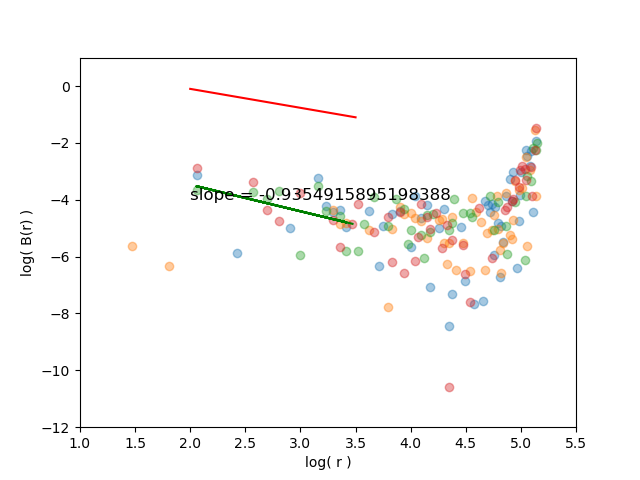

c [-0.93549159 -1.59880398]


/tmp/ipykernel_4711/2342834893.py:45: RuntimeWarning: divide by zero encountered in log
  plt.scatter(np.log(rsTemp),np.log(binnedBdTemp),alpha=0.4)
/tmp/ipykernel_4711/2342834893.py:45: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(rsTemp),np.log(binnedBdTemp),alpha=0.4)
/tmp/ipykernel_4711/2342834893.py:55: RuntimeWarning: divide by zero encountered in log
  y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]
/tmp/ipykernel_4711/2342834893.py:55: RuntimeWarning: invalid value encountered in log
  y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]


Text(2, -4, 'slope = -0.9354915895198388')

In [99]:
plt.figure()
h,bins,f=plt.hist(uniqDist,bins=100)

for r in range(runs):
    rs = []
    binnedBd = []
    for ra,rb in zip(bins[:-1],bins[1:]):
        gate = np.logical_and(uniqDist>=ra, uniqDist<=rb)
        binnedBd.append(np.mean(np.array(Bd[r])[gate]))
        rs.append(0.5*(ra+rb))

    plt.figure()
    plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
    plt.scatter(np.log(rs),np.log(binnedBd),alpha=0.4)
    plt.plot([2,3.5],[-0.1,-0.1 -(1)],'r')
    #plt.xlim((2,4))
    x=np.log(rs)
    y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]
    gate= np.logical_and(np.logical_and(x>2, x<3.5),np.isfinite(y))
    x=x[gate]
    y=y[gate]

    A = np.vstack([x, np.ones(len(x))]).T
    #print(x,y)
    # Direct least square regression
    alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
    print('c',alpha)
    plt.plot(x, alpha[0]*x + alpha[1], '-g')
    plt.ylabel('log( B(r) )')
    plt.xlabel('log( r )')
    plt.xlim((1,5.5))
    plt.ylim((-12,1))
    plt.text(2, -4, 'slope = '+str(alpha[0]), fontsize=12)
    
plt.figure()
rs = []
binnedBd = []    
for r in range(runs):
    rsTemp = []
    binnedBdTemp = [] 
    for ra,rb in zip(bins[:-1],bins[1:]):
        gate = np.logical_and(uniqDist>=ra, uniqDist<=rb)
        binnedBdTemp.append(np.mean(np.array(Bd[r])[gate]))
        rsTemp.append(0.5*(ra+rb))
    plt.scatter(np.log(rsTemp),np.log(binnedBdTemp),alpha=0.4)
    binnedBd = binnedBd + binnedBdTemp
    rs = rs + rsTemp
    


#plt.scatter(np.log(uniqDist),np.log(Bd[r]),alpha=0.4)
#plt.scatter(np.log(rs),np.log(binnedBd),alpha=0.4)
plt.plot([2,3.5],[-0.1,-0.1 -(1)],'r')
x=np.log(rs)
y=np.log(binnedBd)#[np.logical_and(x>2, x<4)]
gate= np.logical_and(np.logical_and(x>2, x<3.5),np.isfinite(y))
x=x[gate]
y=y[gate]

A = np.vstack([x, np.ones(len(x))]).T
#print(x,y)
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print('c',alpha)
plt.plot(x, alpha[0]*x + alpha[1], '-g')
plt.ylabel('log( B(r) )')
plt.xlabel('log( r )')
plt.xlim((1,5.5))
plt.ylim((-12,1))
plt.text(2, -4, 'slope = '+str(alpha[0]), fontsize=12)

# Neuron with Asymmetry

<IPython.core.display.Javascript object>


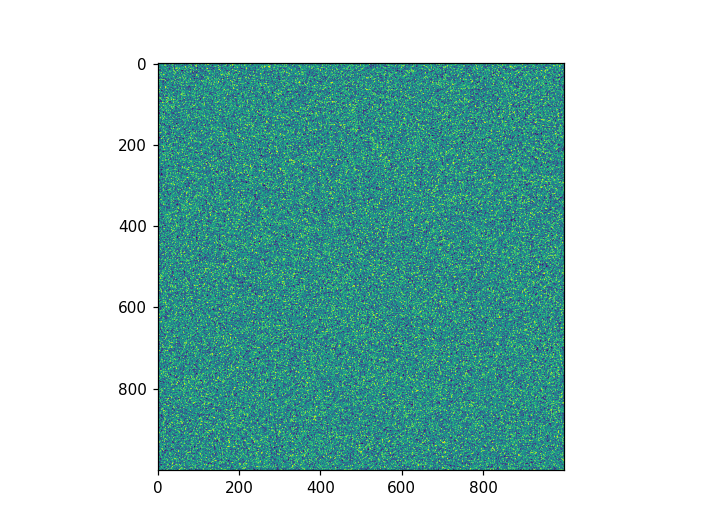

<IPython.core.display.Javascript object>


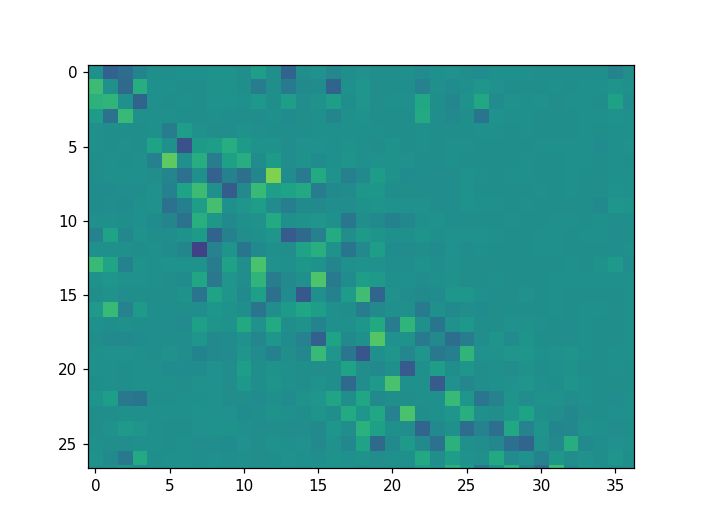

True

In [122]:
signs = s0 = 2*np.random.binomial(1, 0.5, (N,N))-1
for i in range(N):
    for j in range(i,N):
        signs[j,i] = - signs[i,j]
for i in range(N):
    signs[i,i] = 0 
plt.figure()
plt.imshow(signs)

plt.figure()
plt.imshow(signs*J)
signs[50,20] == - signs[20,50]

<IPython.core.display.Javascript object>


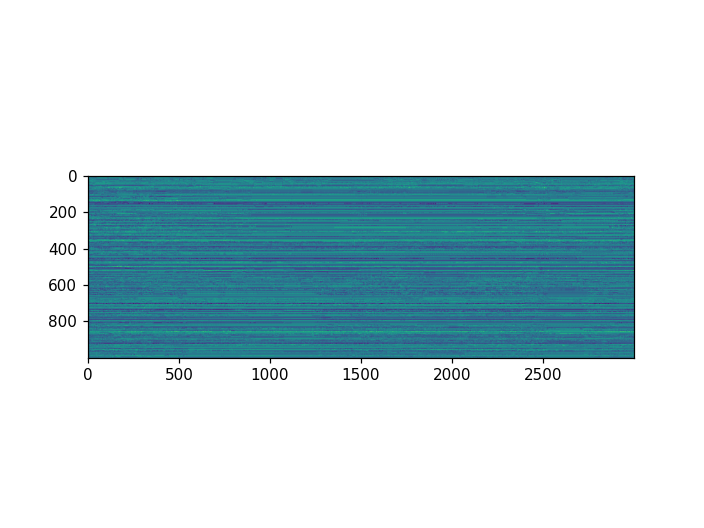

<IPython.core.display.Javascript object>


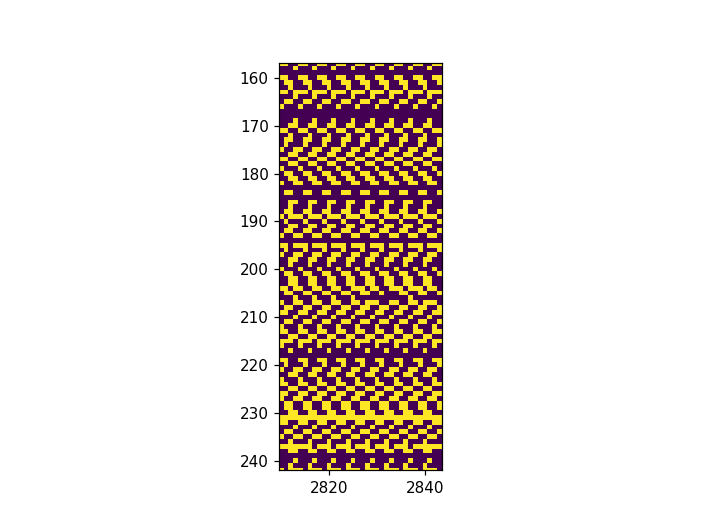

<IPython.core.display.Javascript object>


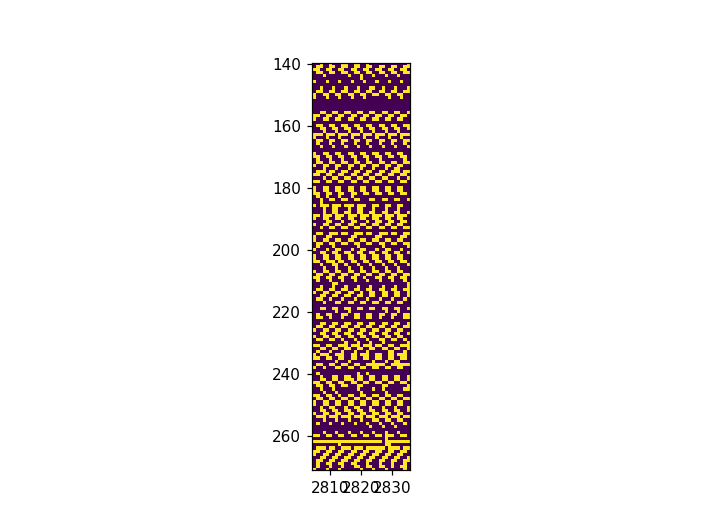

In [139]:
runs = 3
passi = 3000
states = np.zeros((runs,passi,N))
Jas = signs*J


for r in range(runs):
    s0 = np.random.binomial(1, 0.1, N)
    states[r,0,:] = s0

    for t in range(1,passi):
        s1 = getCycles.transPy(s0,Jas,N,typ = 0, thr = 0)
        #print(s1)
        s0=s1.T
        states[r,t,:] = s1.T

    plt.figure()
    plt.imshow(states[r,:,:].T)



In [140]:
uniqDist = np.unique(dist)
#plt.figure()
#plt.hist(uniqDist,bins=100)
ii,jj=np.mgrid[0:N, 0:N]
#print(ii)
#print(jj)

Bd = [[] for r in range(runs)]

for r in range(runs):
    for d in uniqDist:
        #print(d,np.sum(dist==d))
        iList = ii[dist==d]
        jList = jj[dist==d]
        cors = []
        for i,j in zip(iList,jList):
            cor = np.mean(states[r,:,i]*states[r,:,j])
            cors.append(cor)
        Bd[r].append(np.mean(cors))


<IPython.core.display.Javascript object>


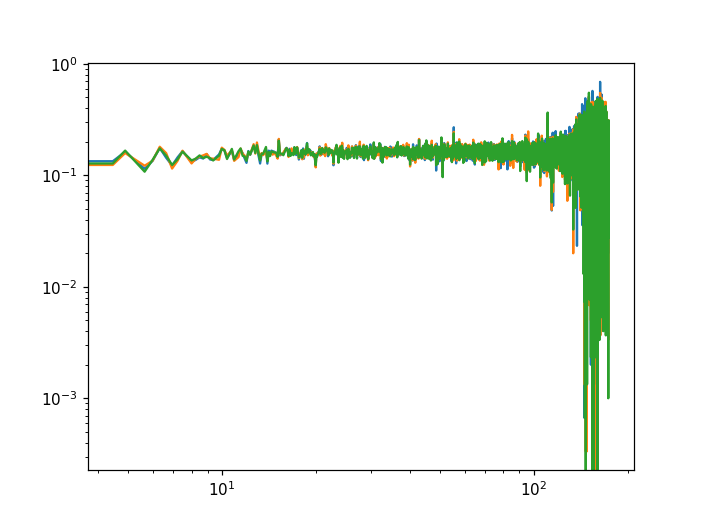

<IPython.core.display.Javascript object>


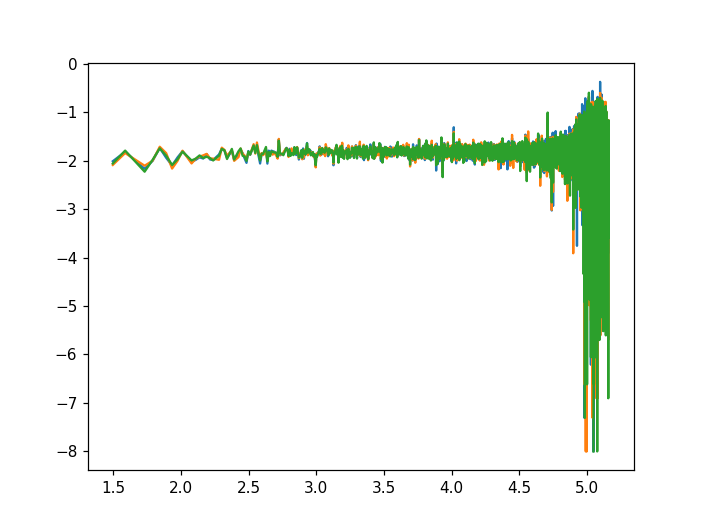

/home/gosti/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


In [141]:
plt.figure()
for r in range(runs):
    plt.plot(uniqDist,Bd[r])
plt.loglog()

plt.figure()
for r in range(runs):
    plt.plot(np.log(uniqDist),np.log(Bd[r]))

<IPython.core.display.Javascript object>


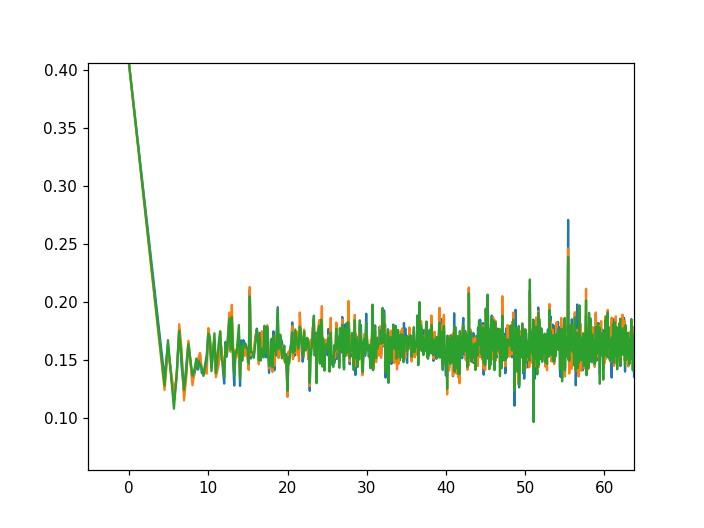

In [143]:
cors = []
ts = range(1,passi)
for t in ts:
    cor = np.mean(states[r,:-t,:]*states[r,t:,:])
    cors.append(cor)

plt.figure()
for r in range(runs):
    plt.plot(uniqDist,Bd[r])

In [136]:
states[0,:0,:].shape

(0, 1000)